In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


In [2]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 
import jax.numpy as jnp
from jax.scipy import stats

# Example images of galaxies

In [15]:
from bpd.draw import draw_exponential_galsim, add_noise
import jax
from bpd.sample import sample_galaxy_params_skew
from bpd.utils import DEFAULT_HYPERPARAMS
from functools import partial

from tqdm import tqdm

In [17]:
n_gals = 100
key = jax.random.key(441)
k1, k2  = jax.random.split(key)
galaxy_params = sample_galaxy_params_skew(k1, n=n_gals, **DEFAULT_HYPERPARAMS)
draw_params = {**galaxy_params}
draw_params["f"] = 10 ** draw_params.pop("lf")
draw_params["hlr"] = 10 ** draw_params.pop("lhlr")
draw_params["x"] = jnp.zeros_like(draw_params["x"])
draw_params["y"] = jnp.zeros_like(draw_params["y"])

_draw_galsim = partial(draw_exponential_galsim, slen=63)
noiseless = []

for ii in tqdm(range(n_gals)):
    _params = {k: v[ii] for k, v in draw_params.items()}
    noiseless.append(_draw_galsim(**_params))

100%|██████████| 100/100 [00:00<00:00, 308.47it/s]


In [19]:
noiseless = jnp.array(noiseless)
noisy = add_noise(k2, noiseless, bg=1.0, n=1)

In [21]:
noisy = noisy[0]

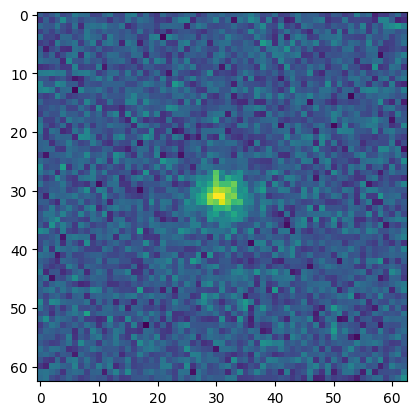

In [80]:
idx = np.random.randint(0, 100)
plt.imshow(noisy[idx])

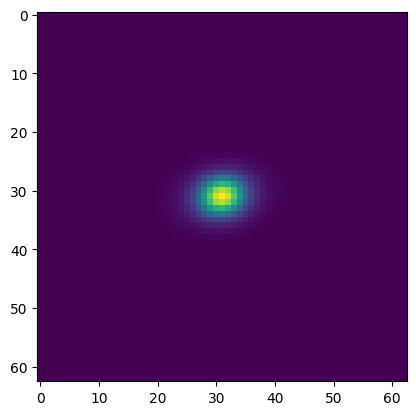

In [86]:
plt.imshow(noiseless[1])

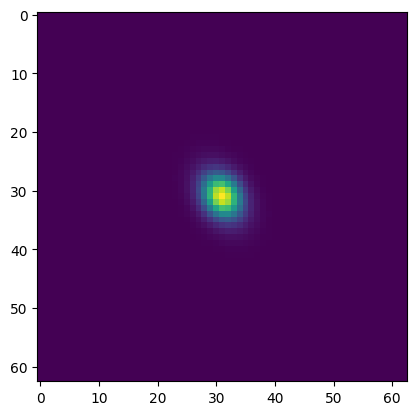

In [87]:
plt.imshow(noiseless[4])